<a href="https://colab.research.google.com/github/Rahul-7131/CrowdSource-Workshop/blob/main/Ronaldo_Messi_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ronaldo-Messi Classifier

In this project, I have created a classifier that detects and classifies the images of the internationally renowned football players Cristiano Ronaldo and Lionel Messi

In [1]:
!pip install fastai --upgrade --quiet

     |████████████████████████████████| 194kB 10.4MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 


In [2]:
from fastai.vision.all import *

**1. Data Collection and Preprocessing**

In [3]:
path = Path('data')
path.mkdir(exist_ok = True)

In [4]:
!wget -q https://raw.githubusercontent.com/Rahul-7131/Practice-Projects-on-Machine-Learning/main/Cristiano%20Ronaldo.txt
!wget -q https://raw.githubusercontent.com/Rahul-7131/Practice-Projects-on-Machine-Learning/main/Ronaldo.txt
!wget -q https://raw.githubusercontent.com/Rahul-7131/Practice-Projects-on-Machine-Learning/main/Lionel%20Messi.txt
!wget -q https://raw.githubusercontent.com/Rahul-7131/Practice-Projects-on-Machine-Learning/main/Messi.txt

In [5]:
download_images('data/ronaldo', Path('Ronaldo.txt'))
download_images('data/ronaldo', Path('Cristiano Ronaldo.txt'))
download_images('data/messi', Path('Messi.txt'))
download_images('data/messi', Path('Lionel Messi.txt'))

In [6]:
files = get_image_files(path)
len(files)

221

In [7]:
failed = verify_images(files)
failed

(#1) [Path('data/ronaldo/00000001.jpg')]

In [8]:
failed.map(Path.unlink) # delete corrupted files


(#1) [None]

In [9]:
files = get_image_files(path)
len(files)

220

**2. DataLoaders**

In [10]:
files[0]

Path('data/ronaldo/00000020.jpg')

In [11]:
Player = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # x,y
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [12]:
dls = Player.dataloaders(path)

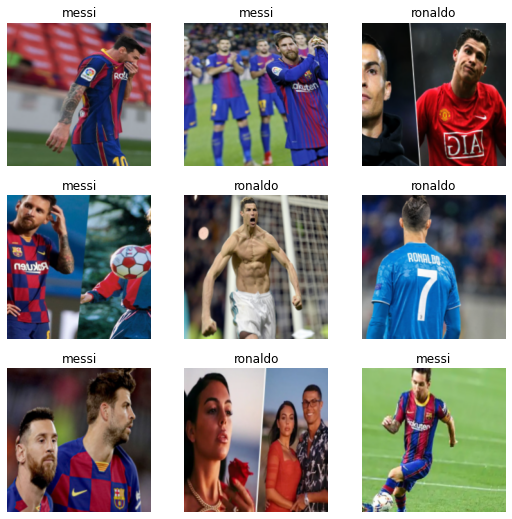

In [13]:
dls.train.show_batch()

**3. Learner**

In [14]:
learn = cnn_learner(dls, resnet34 , metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.095019,0.676326,0.318182,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.815754,0.469239,0.181818,00:07
1,0.671186,0.365442,0.136364,00:07
2,0.597805,0.377330,0.136364,00:07
3,0.515964,0.325333,0.113636,00:07
4,0.455776,0.311829,0.090909,00:07
5,0.399751,0.284542,0.068182,00:07
6,0.345109,0.279025,0.068182,00:07
7,0.312187,0.272370,0.068182,00:08
8,0.275483,0.262353,0.068182,00:07
9,0.250503,0.257737,0.068182,00:07


In [15]:
files[10]

Path('data/ronaldo/00000086.jpeg')

In [16]:
learn.predict(files[10])

('ronaldo', tensor(1), tensor([0.0043, 0.9957]))

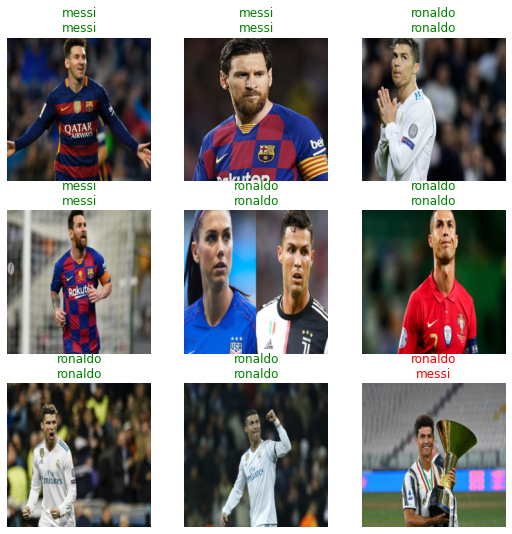

In [17]:
learn.show_results()

**4. Inference**

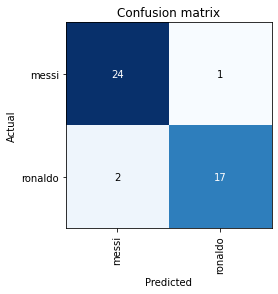

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

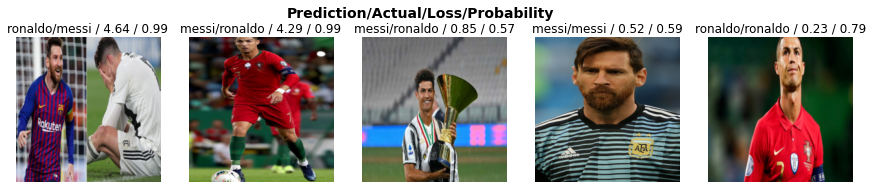

In [19]:
interp.plot_top_losses(5, nrows=1)

**5. Deployment**

In [40]:
learn.export('export.pkl')

In [41]:
!pip install streamlit --quiet
!pip install colab-everything --quiet

In [42]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-10-27 07:21:49--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.164.152.149, 54.84.169.173, 34.200.34.1, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.164.152.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  49.2MB/s    in 0.3s    

2020-10-27 07:21:49 (49.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [43]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [44]:
get_ipython().system_raw('./ngrok http 8501 &')

In [45]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://8a625bfe1dfe.ngrok.io


after executing the following cell, click on the link above ^^


In [46]:
!wget -q https://raw.githubusercontent.com/Rahul-7131/CrowdSource-Workshop/main/app.py
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.199.54.177:8501

2020-10-27 07:22:03.901 NumExpr defaulting to 2 threads.
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
